## Linear regression

Our goal is to set parameters(thetas) so that they will apply the best way possible.For that we need something to compare results.For that we can use Root Mean Square Error(RMSE)(the square sum of all (deviations)^2/n).But it's just easier to compute MSE(RMSE without square).Disadvantage of MSE is that it can overestimate model's badness with noisy(unreliable data).Every minimazer of MSE is also minimazer of RMSE(and vice versa) => it works good.

The line is fit in the folowwing way: first we take the average of the y values, make the horizontal line with such y-intecept.Then, with each iteration, we move a slope a little bit and evaluate the least squares.For each slope and intercept we save the value of the least squares sum, in the end we take deriatives and the one with the 0 slope will be the minimum - the answer.How exactly do we get the values for slope and intercept?When we are moving the line, it means we are moving the intercept.For than intercept we take many instances of the slope value and compare their least squares.The minimum and the best slope is exactly the one with deriative 0(looks like 3-deminsional coordinates).Then, if we add the two methods, then we must compare the minimums of all graphs.

To evaluate model we use $R^2$, which computes the variance of initial median line and new fit line to see how our data changed after we applied new value.For example, the least squares sums for median line were 12, but for new fit line just 2 => our R-square equls to 10/12 ~ 0,83 = 83%.If it hadn't changed or changed just a little, that our value will be around 0% and so on.With the help of R-square our model can get rid of useless features, that doesn't affect the predictions.But, sometimes, especially with the coplex models, we will have a lot of features and, as the result, there is a high chance that some results of randomed skewed data can be misiterpreted affecting the model.To avoid that, we must small p-value with the help of F metric.

**Beware of perfect collinearity!** If we train model without any regulization, we must either use dummy encoding for categorical variables or exclude the fit-intercept of the model or we will fall in "dummy variable trap" or "collinearity problem", because we can predict one value perfectly from another(intercept already tells us what equals to left out variables because we can compute it).But in regulization linear models we must not touch k-th column, because otherwise we will shrink(regularization) the difference between basis(left out) parameter and the i-th parameter(columns now mean $\beta_3 - \beta_1$, $\beta_2 - \beta_1$)<br>
[perfect collinearity video](https://www.youtube.com/watch?v=DDRQYKVFoP0)<br>
[clearly about why not with regulization](https://stats.stackexchange.com/questions/231285/dropping-one-of-the-columns-when-using-one-hot-encoding)<br>
[clearly about collinearities](https://stats.stackexchange.com/questions/224051/one-hot-vs-dummy-encoding-in-scikit-learn)

We use normal equation to minimilize the function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)
plt.plot(X, y, '.')
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
X_hyp = np.c_[np.ones((100, 1)), X]  # create x_0 = 1 + theta_1 * x_1
# According to normal equation formula
theta_best = np.linalg.inv(X_hyp.T.dot(X_hyp)).dot(X_hyp.T).dot(y)
theta_best

array([[2.46759217],
       [3.02391029]])

Aka $\theta_0$ ~ 2 and $\theta_1$ ~ 3, which is according to our equation for X.

In [4]:
X_new = np.array([[1], [2], [3]])
X_new_hyp = np.c_[np.ones((3, 1)), X_new]
y_predict_new = X_new_hyp.dot(theta_best)
y_predict_new

array([[ 5.49150246],
       [ 8.51541275],
       [11.53932304]])

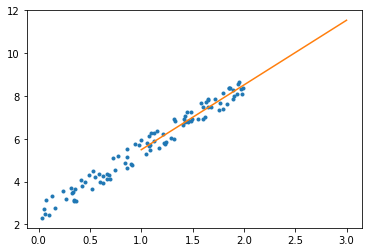

In [5]:
plt.plot(X, y, '.')
plt.plot(X_new, y_predict_new, '-')
plt.show()

It's the same as:

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.coef_, lin_reg.intercept_)
lin_reg.predict(X_new)

[[3.02391029]] [2.46759217]


array([[ 5.49150246],
       [ 8.51541275],
       [11.53932304]])

Normal equation is pretty slow, so it won't work well for models with many feauters(x-s), so we should use Gradient Descent for that instead.<br>
In GD we tweak the parameters until we get a minimum value.E.g. we start with some random theta and take steps to decrese the MSE.Size of the steps is called learning rate and it's important parametr to choose, because if this number is small, than GD will take a long time, otherwise the DG might even diverse, e.g. goining further from the minimum.

But not all function of GD look like the bucket(quadratic function).Sometimes we may have problem of arriving of local minimum instead, or coming across the plateu, which will take a long time to cross.<br>
But we have no problems with that in Linear Regression, that looks like a bowl.Although, we must use the feature scaling, otherwise it may take very long time to converge.<br>
So, in the end, training LR means to get such parameters, which will give us the minimum cost function(MSE), but it will not work in high-dimensional(many features) models, because it will be much harder to find.

We must compute gradient for each parameter(theta) to find how will const function(MSE) change if we tweak a theta a little bit.For that we must take partial deriative(a deriative for each function).It's much better than computing via normal equation, but it still computes X.T * X, which isn't that fast.

In [7]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100  # number of the training examples(rows)

theta = np.random.randn(2, 1)  # random initialization for the start

for iteration in range(n_iterations):
    # compute partial deriative
    gradient = 2/m * X_hyp.T.dot(X_hyp.dot(theta) - y)
    # gradient point upwards => go opposite => substract from theta.
    # multiply the step(gradient) by the learning rate to determine it's size
    theta = theta - eta * gradient
print(theta)

[[2.46759217]
 [3.02391029]]


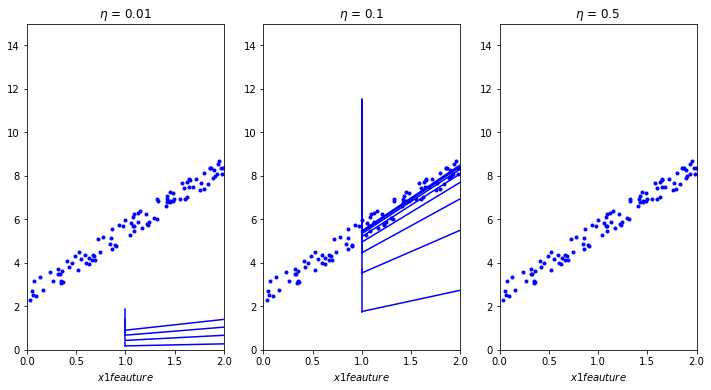

In [8]:
def grad_desc_plot(theta, eta):
    n_iter = 1000
    style = 'b-'
    plt.plot(X, y, 'b.')
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_hyp.dot(theta)
            plt.plot(X_new_hyp, y_predict, style)
        gradient = 2/m * X_hyp.T.dot(X_hyp.dot(theta) - y)
        theta = theta - eta * gradient
    plt.xlabel('$x1 feauture$')
    plt.axis([0, 2, 0, 15])
    plt.title("$\eta$ = {}".format(eta))

theta = np.random.randn(2, 1)

plt.figure(figsize=(12,6))
plt.subplot(131)
grad_desc_plot(theta, eta=0.01)
plt.subplot(132)
grad_desc_plot(theta, eta=0.1)
plt.subplot(133)
grad_desc_plot(theta, eta=0.5)

We can find the learning rate for GD via Grid Search with limited time of iterations and stop after smaller than some tiny number E.

The problem with time in Batch GD can be solved via Stohatic GD, which, as the name implies, uses not the whole data as in Batch GD, but the random one.At the same time, it means that it 'bounces' up and down(going down on average only).So, it won't stop at the end and will continue to bounce, never finding the optimum value like in the first time.But we can change the learning rate for the steps, making them less and less.For that we use learning schelude, which says how we our learning rate will continue to dwindle.Also, SGD has the better chance of finding a global minimum in non-linear, irregular, functions.

In [9]:
m = 100  # number of the training examples(rows)
n_epoch = 50  # each round
eta0, eta1 = 5, 50  # so that initially we have 0.1 and go smaller

theta = np.random.randn(2, 1)

def learning_schedule(t):
    return eta0 / (eta1 + t)

for epoch in range(n_epoch):
    for i in range(m):
        rand_id = np.random.randint(m)
        x_i = X_hyp[rand_id: rand_id + 1]
        y_i = y[rand_id: rand_id + 1]
        gradient = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_schedule(m * epoch + i)
        theta = theta - eta * gradient

In [10]:
theta

array([[2.46432186],
       [3.00180579]])

In [11]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[2.44138124] [3.03694387]


## Minibatch Gradient Descent
It's the same as SGD, but not so erratic, but a little bit slower, with room for optimization for matrix operations.We take not 1 sample, but a small batch of data.<br>
When comparing, Batch GD is the slowest, but the most precise(although it's a little difference), then goes MGD and SGD

## Polynominal regression
We fit linear model in non-linear data via PR.

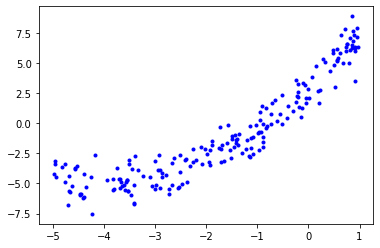

In [12]:
m = 200
X = 6 * np.random.rand(m, 1) - 5
y = 0.5 * X ** 2 + 4 * X + 3 + np.random.randn(m, 1)
plt.plot(X, y, 'b.')

In [13]:
from sklearn.preprocessing import PolynomialFeatures  # to convert into polynomial features(to make feautres)
# https://stackoverflow.com/questions/51906274/cannot-understand-with-sklearns-polynomialfeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
print(X[0])
print(X_poly[0])


[-3.50968238]
[-3.50968238 12.31787041]


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.coef_, lin_reg.intercept_)

[[3.92489627 0.49193428]] [2.87156291]


Polynominal can also find relations between features, because it takes all possible combinations(for 'degree=3' it will be $a^2$, $b^2$ $a^3$, $b^3$, and, most importantly for relations, $a^2b$, $ab^2$, $ab$. But because of this we can achieve a **curse of dimensionality**, which will make our data very sparse and => without any meaning.

In essence, we take features, that are linear, and make them quadratic, so that the line will pass near data points.As I understand, we find relationships between the values and than, according to them, apply our curve.<br>
Also there is the same tradeoff as in the classification, called *bias-variance tradeoff*.Bias is how simplistict our data assumption are, high bias indicated *under-fitting*.Variance is exact the opposite, how complex our model is for our data, that implies on *over-fitting*.<br>
[wonderful blog](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)

We can decide how complex our data should be using cross-validation to get generalization parameter and RMSE to get how well our model preformce.If generalazation it big, but RMSE is good, then it's overfitting, on other hand, if both are low, then it's underfitting.<br>
The second way to evaluate how well our data performce is to look at the learning curve to see how it changes the metrics with the more data.

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_errors.append(mean_squared_error(y_test_predict, y_test))
    plt.plot(np.sqrt(train_errors), 'b-', label="training set", linewidth=2)
    plt.plot(np.sqrt(test_errors), 'r-', label="test set", linewidth=3)
    plt.legend(loc="upper right")

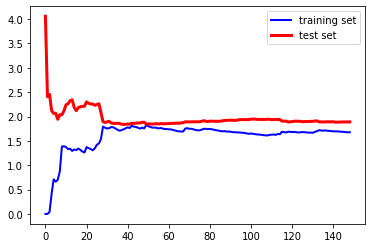

In [16]:
lin_reg = LinearRegression()
plot_learning_curve(X, y, lin_reg)

It's the example of underfitting data, they are close high.Let's check with others

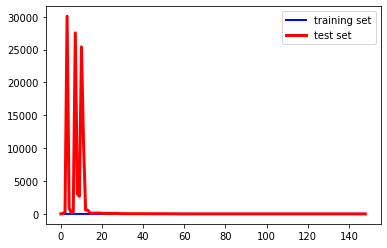

In [17]:
from sklearn.pipeline import Pipeline
polynom_regression = Pipeline((
    ("poly_feauters", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
))
plot_learning_curve(X, y, polynom_regression)


We see a huge gap here, and error is smaller than in case of Linear Regression, so it's overfitting model.But we can fix the situation using more data.

The generalization error is the sum of the bias, which implies how much our assumption is wrong, usually used to indicate under-fitting data, variance, that measures sensetivity of the data, and irreducibale error, that occurs becase of the noises and the only way to fix it is to fix the root of the data collecting problem.

## Regularazation of the models
One way to escape overfitting the model is to constrain it, like we did with degrees for Polynomial Regression.Now we will work with weight in Ridge, Lasso and Elastic Net Regressions.<br>
Ridge regression is also called L2 regulization, when Lasso is called L1 regulization.

All following info found in wonderful video [from youtube](https://www.youtube.com/watch?v=Q81RR3yKn30)

### Ridge Regression

This constrain works based on the trade-off.We pay with a small amount of bias(aka making model intentionally not so good with additional weight) for the significant drop in variance(aka data will fit with other test sets much better).This works in the following way: we add additional weight $\lambda$ * $slope^2$', which will incline our slope a little bit.With that our initial least squares(linear model) will not be so good, because of the weight.When we move closer to the changed slope, we will get lesser least squares and will accept that model.<br>
The formula for Ridge Regression is (sum of squared residuals) + $\lambda$ * $slope^2$'<br>
At the same time, because we make the slope smaller, Ridge Regression is less sensetive to the x axis feauture than the initial least squares model.That's why we must accurately choose lambda, the higher we make it, the less sensetive is our model for the x feature, the slope get assymptoticaly closer to zero.To find the right lambda we just use cross-validation to compare different ones which give the smaller variance.

The model can work not only with continuos values, but also with discrete.We just make change the slope for boolean: intercept(the mean of the $A$ instance) + difference between the two instances mean * boolean('if value == B return true').So, the sum of the two features will be the mean of the &B& instance.This time, Ridge Regression works with the value that substituted the slope: the difference between two means.It adds $\lambda * difference^2$.In other words, it makes the difference shrink, which results in more bias: the model becomes less sensetive to the difference between two instances.On other hand, normal leas squares take the deviations from the means of the corresponding instances.

From above explanation we can conclude, that Ridge Regression can be also applied to the Logistic Regression.It makes the, for example, IsObese less sensetive to the weight.

Also, we can apply Ridge Regression to more complex models, summing up all parameters in square of the equations, **except** y-intercept.Because every parameter will be scaled by it's feauture value, when y-intersept doesn't have it.So, it will shrink some parameters to make variance lesser.

One of the biggest advantages of the Ridge Regression is that it can make good predictions even when there isn't enough data.For example, for 2 feautures we will have intercept and 1 parameter.If we have only 1 data point, we can't tell which line passes through in the better the dot.Least square model will give us the same results.So, for least squares we need at least two data points.The same goes for higher dimensions.For 3 feautres we can't say which plane passes though better than other with just 2 data points, but with 3 it goes OK.So, if we have $n$ features, we must have at least n data points.But it can be insanely expensive, for example, to collect genomes for each instance.So, we use Ridge Regression, drop all the squared parameters in the sum, use penalty(cross-validation to choose one) and tune the model.We can see that it will perfom well. 

In the end, we use Ridge regression when we don't have enough samples, making the samples less sensetive to the training data, ensuring the future predictions from new data will be better.

In [18]:
# Using closed-form solution
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1]])

array([[4.78779571]])

In [19]:
# Using gradient descent(Stohatic)
sgd_reg = SGDRegressor(penalty='l2')  # L2 = RidgeRegression
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1]])

array([4.69976978])

### Lasso ( Leas Absolute Shrinkage and Selection Operator)

Almost the same as Ridge Regression, but the biggest difference is that the additional weight is computed via absolute value of the slope(all parameters except y-intercept), aka $\lambda * (|paremetr 1| + |parameter 2| + ... |parameter n|)$.It allows us to exclude the values that play no role in prediction, because can not just go assyptoticaly to zero, but equl to zero.

Coefficient(lambda) is also searched via cross-validation.It works the following way: we divide train data in n folds(usually 10 and is called 10-folds cross-validation) and sum the errors of each fold for each instance of lambda.In the end, we have overall score of 10 folds.We compare this score with each other and choose the minimum, which will work the best way.<br>
Can also be used to find the best model for training data.

In [20]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1]])
# can do the same with SGDRegressor using l1 penalty

array([4.70981298])

### Elastic Net
The mix of both Ridge Regression and Lasso Regression with regulated parameter $r$, which says how much influence one regression has over other(0 - Ridge Regression, 1 - Lasso).<br>
Formula = MSE + $r * \lambda * sum(|\theta_i|)$ +  1-r/2 * $\lambda$ * sum($\theta ^ 2$)

Which is preferable to use when?Plain LR is mostly unused, the default is Ridge to avoid overfit.But if we suspect, that most of the features are useless, we must use Lasso or, to be safe of hardships with Lasso because of data set is smaller than the number of features(or some values are highly correlated), it's better to use Elastic Net.

In [21]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)  # l1_ratio = r
elastic_net.fit(X, y)
from sklearn.base import cloneelastic_net.predict([[1]])

array([4.66450326])

In other words, Elastic Net shrinks and groups the parameters of the correlated feautures.If they are useless, they are removed all at once.Otherway, they are all left behind.

### Early stopping
This is a technique to stop iterative learning algorithms like Gradient Descent.We just insure we won't overfit the model when the model reaches minimum via Batch GD or starts rising from the current minimum for quite some time in random algorithms such as Stohatic and Minibatch GD.

In [50]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

# Create pipeline to transform into polynomial feautures(with obvious overfit) and scale them for GD
poly_transform_scale = Pipeline((
    ("poly_feauters", PolynomialFeatures(degree=90, include_bias=False)),
    ("sclaer", StandardScaler()),
))

X_train, X_val, y_train, y_val = train_test_split(X, y.ravel(), test_size=0.5)

# We must fit one time first so we can transform them
X_train_poly = poly_transform_scale.fit_transform(X_train)
X_val_poly = poly_transform_scale.transform(X_val)

sgd_reg = SGDRegressor(eta0=0.005, learning_rate='constant', max_iter=1, warm_start=True, penalty=None, tol=-np.infty)
# Note! warm_start parameter shows model to complete training after the stop!Change 'tol' to None to avoid stopping model
best_model = None
best_epoch = None
min_error = float("inf")
for epoch in range(1000):
    sgd_reg.fit(X_train_poly, y_train)
    y_predict = sgd_reg.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_predict)
    if val_error < min_error:
        min_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
min_error

84.68603535171573

In [52]:
best_epoch

0

In [43]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

## Logistic Regression
Regression that can be used for classification.Main idea behind algorithm is to calculate the probability it belong to the class.If it's higher than 50%, then it is sorted in that class, otherwise it is declined.

So, Logistic regression is used to predict if value is true or not.If it's classification, it uses this scores to classify the data, otherwise it predicts the probability of truth.As linear regressions, it can use multiply feautures, both discrete and continuos.But unlike regression, it can't compare more complex and simple models, because there is no such concept as $R^2$ as in case of linear regressions.Instead of least squares it uses something called **maximum likelihood** to calculate how well this model perfoms on the given data(they are multiplied and the maximum of all models is take as the logistic regression).It also can reject usless features, assesing if they are *totes useless*.Do to that we just test data to see if it's effect on the data is significatly different from 0(we just throw it out and look).To asses if it's useless or not, we use *Walde's test*.

We use estimated probability *p* to build cost-function, that uses negative logariphm of that p.The main idea is to set parameters $\theta$ so that it will high probabilities if the instance is positive and low pobabilities if instance is negative.So, we estimate $-log(p) if y = 1 $and $-log(1 - p) if y = 0$.<br>
As such, we can built similar cost function to the linear regression.But this time we can't use closed-form equation to compute everything in one go, but because function is convex, we can use iterative algorithm to find global minimum using Gradient Descent.Suprisingly, deriatives from *log loss*(logistic cost function) is almost the same as for linear.

Let's predict Iris-Vedinica type of plants using petal width.

In [65]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris['data'][:, 3:]  # just petal width
# convert target values in boolean base on if it is Iris-Veginica or not
y = (iris['target'] == 2).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [68]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

C:\Users\1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

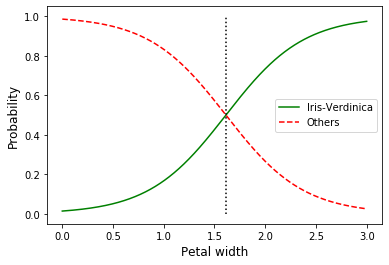

In [84]:
# let's build artifical dataset with petals varying from 0 to 3
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_predict = log_reg.predict_proba(X_new)  # outputs the probabilities, not true-false values
plt.plot(X_new, y_predict[:, 1], "g-", label="Iris-Verdinica")
plt.plot(X_new, y_predict[:, 0], "r--", label="Others")
plt.legend()
plt.ylabel("Probability", fontsize=12)
plt.xlabel("Petal width", fontsize=12)
# Draw deceion-boundary.
desicion_boundary = X_new[y_predict[:, 1] >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', label='decision boundary')

As we can see, decision boundary is around 1,6.In other words, if go beyond 1,6 classifier will output true(because >50%), otherwise it will output false.Values after 2 and values before 1 will be obviously distributed as true and false, because we have are confident about that from high and low probabilities.But between that extremes, classifier is unsure.Altough it's not confident, it still outputs accroding to its master-decision boundary.

In [88]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax Regression
Instead of training multiple Logistic Regressions for many classes and then combining them, we can use Softmax Regression, that

There is no particular order for the possible outcomes(it's nominal dependent variable).We can have two and more output classes for this regression(not just binary as in case of logistic), as well many independent variables.<br>
Simple approach it to build k binary logistic regressions for k outcomes: let's assume we have 3 possibles outcomes (A, B, C).We build model where A is truth and B,C is false, than we do the same for all other classes.We take the probabilities for each outcome(p(A), p(B) and p(C)) and compare with each other.We will accept the one with the highest probability score as the truth.<br>
More advanced approach is just to take k-1 values, because probabilities of all k - 1 values + the last one equals to the 1.So, we can choose one outcome as a baseline and act according to that.In this case you divide probabiliy of one instance in the sum of probability for all other instances(which is probability of our baseline feature in essence).It's a way to normalize probabilites(make them between 0 and 1, common scale[blog](https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)).[video about essence of multinoinal(softmax) regression](https://www.youtube.com/watch?v=Mi992wr6zKc)<br>
We use cross-entropy to minimize the function.It has the same meaning as in logistic regression: when probability is high, it will assign big value, otherwise low value.[read here](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)<br>
This regression can be used to only output one instance(like the type of flower) and not multiply(all people on the picture).

In [91]:
X = iris["data"][:, (2, 3)]  # petal width and length
y = iris["target"]
# multi_class indicate that we now use softmax, solver lbfgs is used for L2 regulization, the lower is C, the higher is lambda
softmax_reg = LogisticRegression(solver="lbfgs", multi_class="multinomial", C=10)
softmax_reg.fit(X, y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [92]:
softmax_reg.predict([[5, 2]])  # petal with 5 cm length and 2 width is Iris-Verginica

array([2])

In [93]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

We must use regulization for LR, because with large number of independent variables(parameters) it will fit the data almost perfectly and obviously result in overfit.Also, it will tailor the function if amount of given data was small.<br>
[About solving methods](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions/52388406)

### More information about logistic regression
Logistic regression is, as well as simple regression and polynomial regression, a patf of Generilized linear model(which is trying to fit some template for all algorithms).Actually, the only actual difference is that we work with data points, that situates itself in negative and positive infinity, so we can't find the least square fit.But, we can actually easily solve this problem if we think of y-axis as logs of the odds.The odd is not the same as probability: it shows us how much our data is skewed(aka, 5 blue points, 4 red ones => odds are 5/4, not 5/9 like probability).We take the logs, because positive 'inclanation' is between 1 and infinity, when negative one is between 0 and 1.So, to make odds symmetric and usable, we take the logs.So, in the end, we can transform logs of the odds y-axis in probability, that we use for logistic regression.Also, the equation for logistic regression is built via encoding the categorical variables(we create n-1 variables from all n possible outcomes, taking one as a basis(we will substract from one possibility the other) to avoid the perfect correlation).<br>
The line is created the following way: we project data on the line in graph with log(odds), transform to probability and then evaluate something called *maximum likelihood*, which in essence is just probability(plays the same role as least square for linear regression).Than we can check if all parameters are non-useless with the help of p-value(the possibility for null-hypothesis(the opposite to the desired outcome) or something even rarer happening), which is also computed with the help of $R^2$, which can be computed in 10 different ways(but essentialy, almost the same).If p-value is lower than 0,05 than the correlation is statisticaly significant, otherwise we can delete the feature.<br>
The coefficients for logistic regression are the same as for linear model(y-intercept and slope(regulated by variables, like, for example, weight), it shows the scalar for features, standard error and z-score(how many standard deviations above the data we are, is it statisticaly significant).The interesting thing starts when we work without continuous(just probability) variables, where we make "switches" for the means of categorical outcomes.By convention, we just summ everythin up(for i > 2 outcomes there is difference between the means to make better-looking design matrix, which is needed to compute t-test to check correlations between varibales).In coefficients this time we take for the intercept the first mean and other show how having one variable increaces(dicreases) on the log scale the odds of true.

Also, there are some test to find correlations, like t-test for continuous and categorical varibales(computed comparing the mean), ANOVA(analysis of variance, which is essentially just many t-tests for many categorical features), Chi-square test for comparing two(or more) categorical varibales and so on.

Mostly taken from series for logistic regression:<br>
[see for better understanding](https://www.youtube.com/watch?v=vN5cNN2-HWE&t=946s)